# Implementing an AutoEncoder on the MNIST Dataset

In [1]:
pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization

#MNIST Data Processing

In [4]:
#Loading the MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

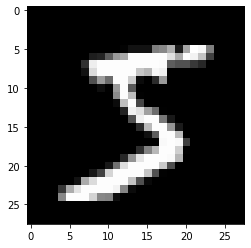

In [ ]:
plt.imshow(X_train[0], cmap='gray', interpolation='none')

## Normalizing the Data

In [ ]:
#Printing the shape of the train and test sets before normalising
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)
print("y_train shape = ", y_train.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (60000, 28, 28)
X_test shape =  (10000, 28, 28)
y_train shape =  (60000,)
y_test shape =  (10000,)


In [ ]:
#Building the input vector
#MNIST has 60000 images in the train set and 10000 images in the test set, therefore total 70000
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784) 

In [ ]:
#Converting them to floating points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalizing the data by diving by 255 so the data is within 0 to 1 as max pixel value is 255
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#Printing the final input shape ready for training
print("X_train shape = ", X_train.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (60000, 784)
X_test shape =  (10000, 784)


#Simple AutoEncoder 

Before training an AE there are 4 factors that we would need to fix:

1. Code Size: refers to the number of neurons we would want in the code layer. The lesser number of neurons = more compression.

2. Number of layers: Usually in an AE, the decoder is a mirror image of the encoder, but that might not always be the case, but this AE, is a symmetric one. The number of layers affects how deep/complex the model is.

3. Number of nodes per layer: # of nodes in the input layer = # of nodes in the output layer as an AE aims to copy the input to the output with some changes. The number of neurons in the code layer will be smaller than the input layer.

4. Loss Function: Usually use Binary Crossentropy (when input values are between 0 and 1) and MSE otherwise.

We will train the Autoencoder by using X_train as both the input and the output as the outputs of the autoencoder are supposed to resemble the inputs although with some changes such as reduction in dimensionality.

## Model 1

Model 1 has 1 hidden layer in the Encoder and Decoder, each having 128 neurons and 32 neurons in the code layer. 

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_a = Input(shape=(784,))
encoder_a = layers.Dense(128, activation = "relu")(input_layer_a)
code_a = layers.Dense(32, activation = "relu")(encoder_a)

#DECODER
decoder_a = layers.Dense(128, activation = "relu")(code_a)
output_layer_a = layers.Dense(784, activation = "sigmoid")(decoder_a)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_1 = Model(input_layer_a, output_layer_a)

In [ ]:
#Compiling the Model
autoencoder_1.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_1 = autoencoder_1.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1903
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1008
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0934
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0899
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0877
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0867
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0856
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0848
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0840
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0835
Epoch 11/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0830
Epoch 12/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0827
E

In [ ]:
#Reconstructions
reconstruction_1 = autoencoder_1.predict(X_test)

## Model 2

Model 2 has 2 hidden layers in the Encoder and Decoder, with the hidden layers having 128 and 64 neurons and the code layer having 32 neurons. 

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_b = Input(shape=(784,))
encoder_b1 = layers.Dense(128, activation = "relu")(input_layer_b)
encoder_b2 = layers.Dense(64, activation = "relu")(encoder_b1)
code_b = layers.Dense(32, activation = "relu")(encoder_b2)

#DECODER
decoder_b1 = layers.Dense(64, activation = "relu")(code_b)
decoder_b2 = layers.Dense(128, activation = "relu")(decoder_b1)
output_layer_b = layers.Dense(784, activation = "sigmoid")(decoder_b2)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_2 = Model(input_layer_b, output_layer_b)

In [ ]:
#Compiling the Model
autoencoder_2.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_2 = autoencoder_2.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2035
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1118
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1015
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0961
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0932
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0907
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0897
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0869
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0863
Epoch 11/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0855
Epoch 12/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0851


In [ ]:
#Reconstructions
reconstruction_2 = autoencoder_2.predict(X_test)

## Model 3

Model 3 has 1 hidden layer in the Encoder and Decoder, each having 128 neurons and 16 neurons in the code layer. 

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_c = Input(shape=(784,))
encoder_c = layers.Dense(128, activation = "relu")(input_layer_c)
code_c = layers.Dense(16, activation = "relu")(encoder_c)

#DECODER
decoder_c = layers.Dense(128, activation = "relu")(code_c)
output_layer_c = layers.Dense(784, activation = "sigmoid")(decoder_c)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_3 = Model(input_layer_c, output_layer_c)

In [ ]:
#Compiling the Model
autoencoder_3.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_3 = autoencoder_3.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2001
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1206
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1139
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1101
Epoch 5/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1064
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1051
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1036
Epoch 8/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1024
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1017
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1010
Epoch 11/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1004
Epoch 12/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1004
E

In [ ]:
#Reconstructions
reconstruction_3 = autoencoder_3.predict(X_test)

## Model 4

Model 4 has 1 hidden layer in the Encoder and Decoder, each having 64 neurons and 8 neurons in the code layer. 

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_d = Input(shape=(784,))
encoder_d = layers.Dense(64, activation = "relu")(input_layer_d)
code_d = layers.Dense(8, activation = "relu")(encoder_d)

#DECODER
decoder_d = layers.Dense(64, activation = "relu")(code_d)
output_layer_d = layers.Dense(784, activation = "sigmoid")(decoder_d)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_4 = Model(input_layer_d, output_layer_d)

In [ ]:
#Compiling the Model
autoencoder_4.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_4 = autoencoder_4.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2320
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1502
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1431
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1391
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1368
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1352
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1342
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1331
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1324
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1319
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1317
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1315
E

In [ ]:
#Reconstructions
reconstruction_4 = autoencoder_4.predict(X_test)

##Model 5

Model 5 has 1 hidden layer in the Encoder and Decoder, each having 256 neurons and 128 neurons in the code layer. 

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_e = Input(shape=(784,))
encoder_e = layers.Dense(256, activation = "relu")(input_layer_e)
code_e = layers.Dense(128, activation = "relu")(encoder_e)

#DECODER
decoder_e = layers.Dense(256, activation = "relu")(code_e)
output_layer_e = layers.Dense(784, activation = "sigmoid")(decoder_e)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_5 = Model(input_layer_e, output_layer_e)

In [ ]:
#Compiling the Model
autoencoder_5.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_5 = autoencoder_5.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1589
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0813
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0759
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0733
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0719
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0708
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0702
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0695
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0690
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0688
Epoch 11/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0685
Epoch 12/20
1875/1875 [==============================] - 13s 7ms/step - lo

In [ ]:
reconstruction_5 = autoencoder_5.predict(X_test)

#Comparing the 5 Models

## Comparing the Training Losses

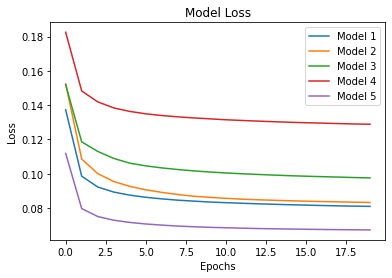

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='upper right')
plt.show()

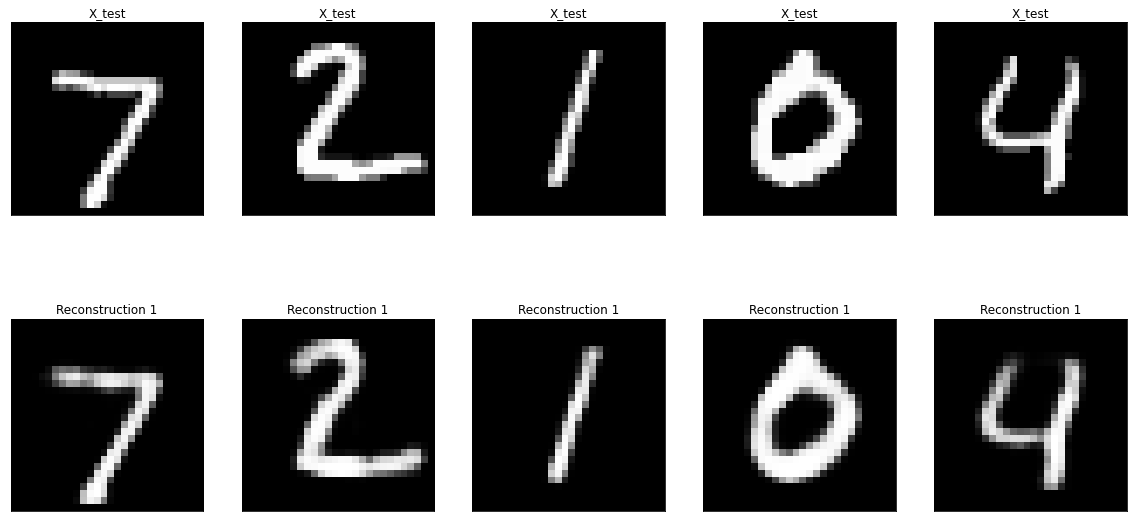

In [ ]:
#MODEL 1
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstruction_1[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Reconstruction 1")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

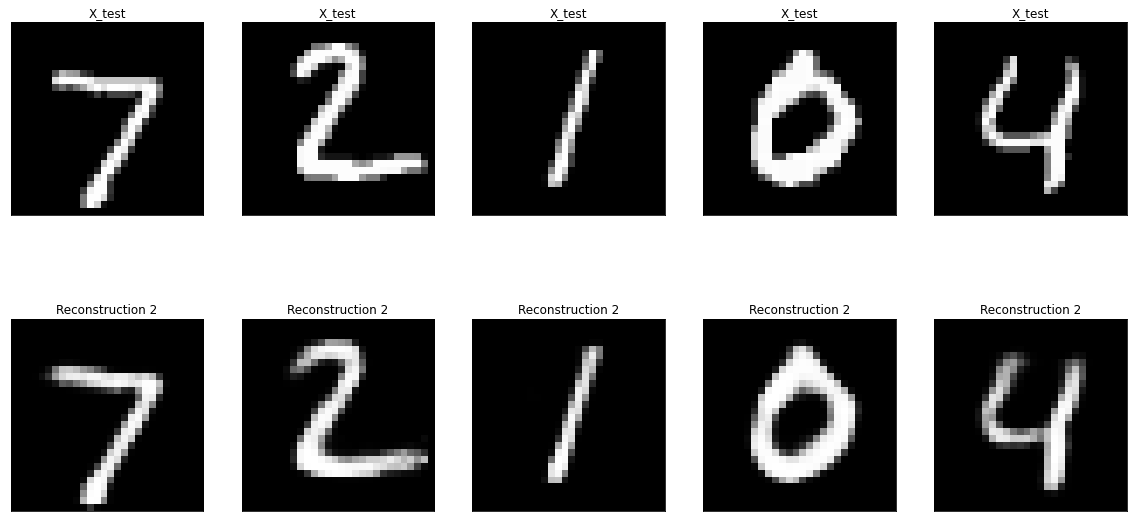

In [ ]:
#MODEL 2
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstruction_2[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Reconstruction 2")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

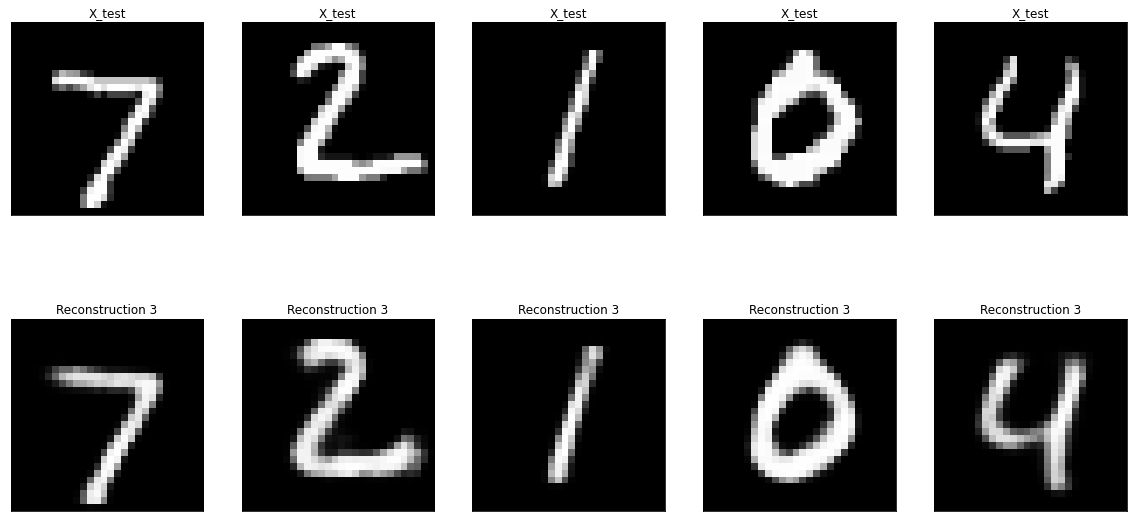

In [ ]:
#MODEL 3
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstruction_3[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Reconstruction 3")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

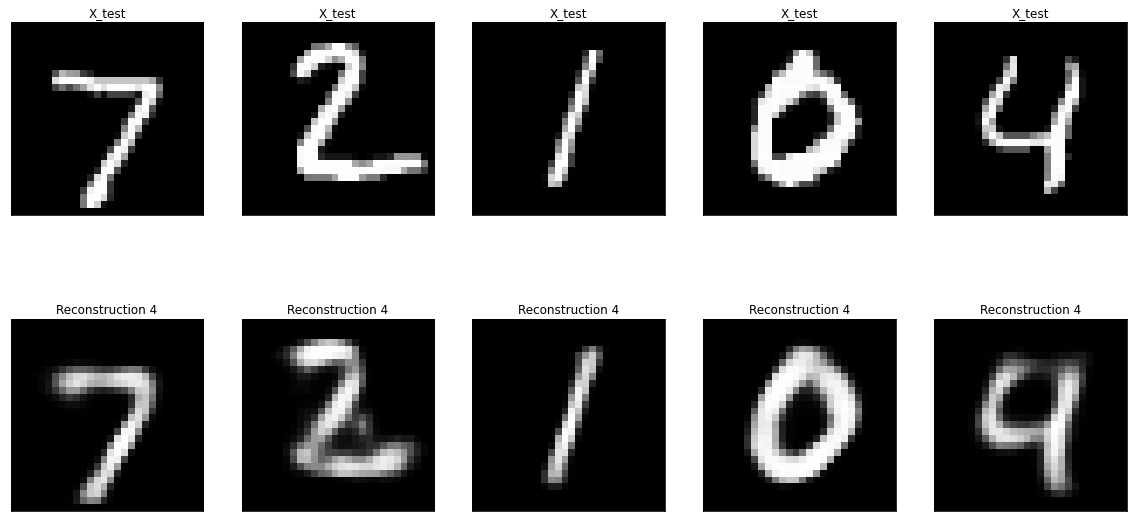

In [ ]:
#MODEL 4
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstruction_4[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Reconstruction 4")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

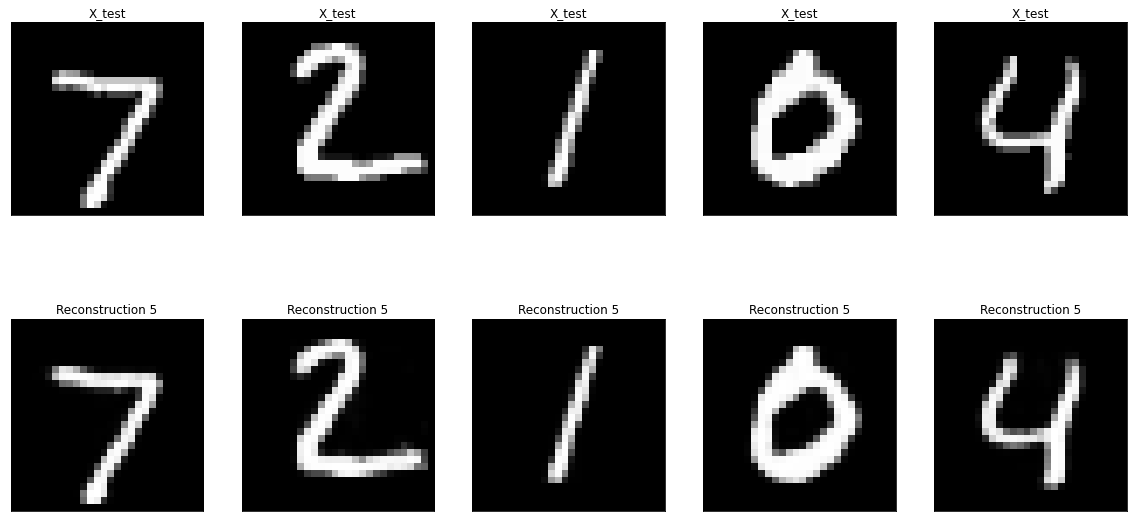

In [ ]:
#MODEL 5
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstruction_5[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Reconstruction 5")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

##Updating Model 4

Updated the Model 4 using BatchNormalization to see how it affects the overall loss.

In [ ]:
#Instantiating the Model using Functional API
#ENCODER
input_layer_d = Input(shape=(784,))
batch_norm_1 = layers.BatchNormalization(axis=1)
encoder_d = layers.Dense(64, activation = "relu")(input_layer_d)
batch_norm_2 = layers.BatchNormalization(axis=1)
code_d = layers.Dense(8, activation = "relu")(encoder_d)

#DECODER
batch_norm_3 = layers.BatchNormalization(axis=1)
decoder_d = layers.Dense(64, activation = "relu")(code_d)
batch_norm_4 = layers.BatchNormalization(axis=1)
output_layer_d = layers.Dense(784, activation = "sigmoid")(decoder_d)
#The output layer uses sigmoid as its activation function as we want the outputs to be between 0 and 1

#Joining the Model
autoencoder_4_upd = Model(input_layer_d, output_layer_d)

In [ ]:
#Compiling the Model
autoencoder_4_upd.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
#Fitting the Model
#The targets of the AE are the inputs hence we supply X_train as its target
history_4_upd = autoencoder_4_upd.fit(X_train, X_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2337
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1539
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1441
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1392
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1370
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1354
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1338
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1329
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1321
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1312
Epoch 11/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1310
Epoch 12/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1303
E

In [ ]:
#Reconstructions
reconstruction_4_upd = autoencoder_4_upd.predict(X_test)

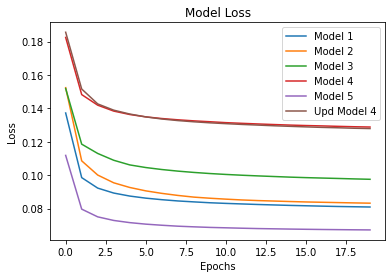

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])
plt.plot(history_4_upd.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Upd Model 4'], loc='upper right')
plt.show()

## Insights

The model with the lowest loss is Model 5, which has the highest number of neurons in its layers, including the code layer. The code layer has the highest number of neurons, which means least compression is done. Hence, the difference between the inputs and the reconstructed output will not be very high.

Adding BatchNormalisation to Model 4 resulted in a small decrease in the loss. This could probably be because the effect of BatchNormalization is truely felt in depeer networks.



#Denoising AE

In [ ]:
#Re-importing the dataset to omit the modifications made earlier on
(X_train,_), (X_test,_) = tf.keras.datasets.mnist.load_data()

##Normalising the Data

In [ ]:
#Converting them to floating points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the data by diving by 255 so the data is within 0 to 1 as max pixel value is 255
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)

X_train =  (60000, 28, 28, 1)
X_test =  (10000, 28, 28, 1)


##Adding Random Noise to the Images

In [ ]:
noise_factor = 0.2

#Add noise by adding the product of the noise factor and random values from the normal distribution
X_train_noisy = X_train + noise_factor * tf.random.normal(shape=X_train.shape) 
X_test_noisy = X_test + noise_factor * tf.random.normal(shape=X_test.shape) 

#Set the values of the tensor within the range 0 and 1
X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0., clip_value_max=1.)

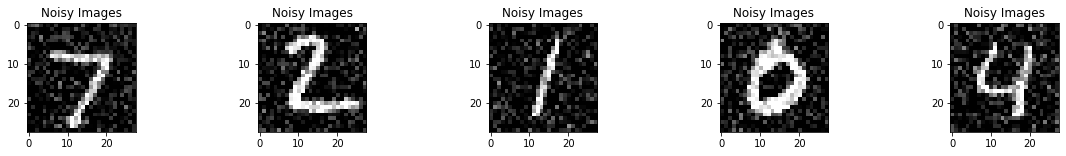

In [ ]:
#Plotting the noisy images
n = 5
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("Noisy Images")
    plt.imshow(tf.squeeze(X_test_noisy[i]))
    plt.gray()
plt.show()

##Defining the Autoencoder

Trained using convolutional layers in the encoder and 

Convolutional layers convolve(slide) over the input image trying to detect patterns and adapt weights accordingly. Transposed convolutional layers can be used to upsample ie: reconstruct original inputs given the result of the convolutional layers of the encoder. 

In [ ]:
#Defining the denoise autoencoder
#The input shape is kept at 28,28,1 as the data is greyscale and thereofre has 1 channel 
class Denoise_AE(Model):
  def __init__(self):
    super(Denoise_AE, self).__init__()
    #Encoder
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, kernel_size = (3, 3), activation='relu', padding='same', strides=2),

      #Code Layer
      layers.Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same', strides=2)]) 

    #Decoder
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      #Output Layer
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')]) 

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

denoise_autoencoder = Denoise_AE()

In [ ]:
#Compiling the AE
denoise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Binary Crossentropy was used as the loss as the input values are between 0 and 1 as we have normalised the data as such.

In [ ]:
hist_den_ae = denoise_autoencoder.fit(X_train_noisy, X_train,
                epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1956
Epoch 2/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0758
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0745
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0736
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0733
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0730
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0726
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0724
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0720
Epoch 10/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0720


In [ ]:
clean_images = denoise_autoencoder.predict(X_test_noisy)

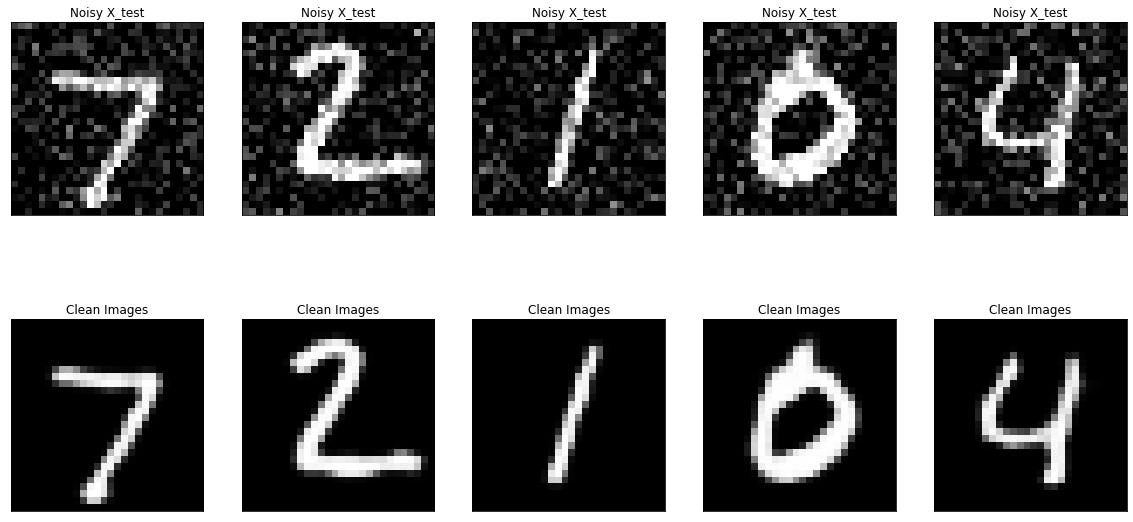

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(tf.squeeze(X_test_noisy[i]))
  plt.title("Noisy X_test")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(clean_images[i].reshape(28,28), cmap = "gray", interpolation = "none")
  plt.title("Clean Images")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
denoise_autoencoder.encoder.summary()

#The output shape can be calculated by the following:
# floor(((n+2p-f)/s)+1) x floor(((n+2p-f)/s)+1) x N'c 
# n = height/width
# p = padding 
# f = filter size
# s = stride
# N'c = number of filters used

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
denoise_autoencoder.decoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


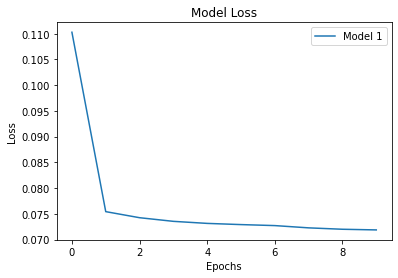

In [ ]:
#Plotting the training loss of the Denoising Encoder
plt.plot(hist_den_ae.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Denoising AE'], loc='upper right')
plt.show()